# FeatureEngineering ver1, Naive Bayes classifier,RandomForestClassifier-LogisticRegression.

The following notebook has focused on feature engineering based on, ”DayOfWeek”, “PdDistrict”, ”hour”, and “year” variables and after extracnign dummy variables it has 55 columns. 


In [1]:
%load_ext watermark
%watermark -a 'Sohrab' -u -d -v -p numpy,pandas,matplotlib
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import cross_validation,preprocessing

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Sohrab 
last updated: 2016-09-01 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1


In [2]:
#Load Data with pandas, and parse the first column into datetime
train=pd.read_csv('../../Dataset/train-2.csv', parse_dates = ['Dates'])
train['hour'] = train.Dates.dt.hour
train['year'] = train.Dates.dt.year

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,2015


In [4]:
cate_variables = ['DayOfWeek','PdDistrict','hour','year']
dfTrain = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(train[var_name], prefix=var_name) 
    train = train.drop([var_name], axis = 1)
    
    if dfTrain.empty:
        dfTrain = df
    else:
        dfTrain = dfTrain.join(df)
        
crimeCat = preprocessing.LabelEncoder()
crime = crimeCat.fit_transform(train.Category)   
dfTrain['crime']=crime

In [5]:
dfTrain.head()

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,crime
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16


## Dose cross_validation provides accurate results on this data set?

In the following I’ve used “BernoulliNB” model, initially with “cross_validation” and on the full test data set and no splitting. Initially, as I was running the cross_validation code several time, it became obvious that each time I run this code I get a different graph, but very similar trend of log_loss values. At the same time, I was getting get a very reproducible log_loss values when I did not use cross_validation or any splitting method. The best part was the resulted cvs file which was tested in Kaggle, is providing a very similar log_loss score as the prediction on test data set. [Prediction section](#prediction)


alpha:  1  LogLoss:  -5.64407646331
alpha:  21  LogLoss:  -4.24563696398
alpha:  41  LogLoss:  -3.95630036501
alpha:  61  LogLoss:  -3.7899627983
alpha:  81  LogLoss:  -3.67436296552
alpha:  101  LogLoss:  -3.58719610643
alpha:  121  LogLoss:  -3.51843037681
alpha:  141  LogLoss:  -3.4625783455
alpha:  161  LogLoss:  -3.41628021477
alpha:  181  LogLoss:  -3.37732493803
alpha:  201  LogLoss:  -3.3441809808
alpha:  221  LogLoss:  -3.31574455566
alpha:  241  LogLoss:  -3.29119420997
alpha:  261  LogLoss:  -3.26990193288
alpha:  281  LogLoss:  -3.25137649002
alpha:  301  LogLoss:  -3.2352260323
alpha:  321  LogLoss:  -3.22113268484
alpha:  341  LogLoss:  -3.20883482273
alpha:  361  LogLoss:  -3.19811441515
alpha:  381  LogLoss:  -3.18878779369
alpha:  401  LogLoss:  -3.18069878533
alpha:  421  LogLoss:  -3.17371351241
alpha:  441  LogLoss:  -3.16771639019
alpha:  461  LogLoss:  -3.16260700026
alpha:  481  LogLoss:  -3.15829761534
alpha:  501  LogLoss:  -3.15471121574
alpha:  521  LogLoss: 

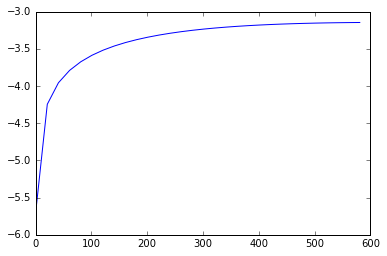

In [6]:
LLscores = []
for a in range(1, 600, 20):
        
    model = BernoulliNB(alpha = a)
    LogLoss = cross_validation.cross_val_score(model, 
                                 dfTrain.drop(['crime'], axis = 1),
                                 dfTrain['crime'],
                                 scoring='log_loss')
   
    
    print( "alpha: ", a,  " LogLoss: " , np.mean(LogLoss))
    LLscores.append(np.mean(LogLoss))
df = pd.DataFrame({'Alpha': range(1, 600, 20), 'LogLoss': LLscores})
plt.plot(df['Alpha'],df['LogLoss'])

alpha:  10 LogLoss:  2.56178921821
alpha:  30 LogLoss:  2.56416136694
alpha:  50 LogLoss:  2.56757028044
alpha:  70 LogLoss:  2.57149074402
alpha:  90 LogLoss:  2.57574050207
alpha:  110 LogLoss:  2.58025139594
alpha:  130 LogLoss:  2.58498984038
alpha:  150 LogLoss:  2.58993113187
alpha:  170 LogLoss:  2.59505339649
alpha:  190 LogLoss:  2.60033636974
alpha:  210 LogLoss:  2.60576151391
alpha:  230 LogLoss:  2.61131212717
alpha:  250 LogLoss:  2.616973337
alpha:  270 LogLoss:  2.6227319902
alpha:  290 LogLoss:  2.62857648725
alpha:  310 LogLoss:  2.63449658034
alpha:  330 LogLoss:  2.64048322043
alpha:  350 LogLoss:  2.64652842919
alpha:  370 LogLoss:  2.65262508963
alpha:  390 LogLoss:  2.65876684306
alpha:  410 LogLoss:  2.66494799189
alpha:  430 LogLoss:  2.67116341263
alpha:  450 LogLoss:  2.67740848304
alpha:  470 LogLoss:  2.68367902087
alpha:  490 LogLoss:  2.68997123218
alpha:  510 LogLoss:  2.69628166766
alpha:  530 LogLoss:  2.70260717474
alpha:  550 LogLoss:  2.70894488103


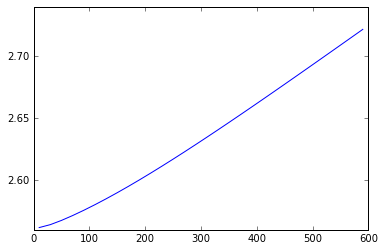

In [6]:
LLscores = []
for a in range (10, 600, 20):
    
    model = BernoulliNB(alpha = a)
    
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("alpha: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'alpha': range(10, 600, 20), 'LogLoss': LLscores})
plt.plot(df['alpha'],df['LogLoss'])

n_estimators:  10 LogLoss:  2.33096392743
n_estimators:  30 LogLoss:  2.32216682011
n_estimators:  50 LogLoss:  2.32023291334
n_estimators:  70 LogLoss:  2.31930937116
n_estimators:  90 LogLoss:  2.31949074067
n_estimators:  110 LogLoss:  2.31893730624
n_estimators:  130 LogLoss:  2.31853359841
n_estimators:  150 LogLoss:  2.3185733328
n_estimators:  170 LogLoss:  2.31838013122
n_estimators:  190 LogLoss:  2.31836427958
n_estimators:  210 LogLoss:  2.31826246239
n_estimators:  230 LogLoss:  2.31801277005
n_estimators:  250 LogLoss:  2.31826500556
n_estimators:  270 LogLoss:  2.31822579801
n_estimators:  290 LogLoss:  2.31828598505
n_estimators:  310 LogLoss:  2.31820891199
n_estimators:  330 LogLoss:  2.31795980205
n_estimators:  350 LogLoss:  2.31818018488


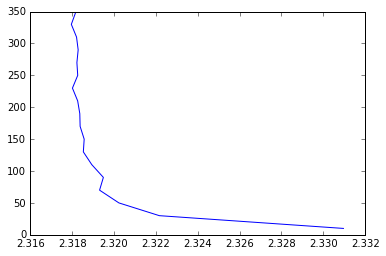

In [7]:
LLscores = []
for a in range (10, 370, 20):
    
    model = RandomForestClassifier(n_estimators = a , 
                                   min_samples_split = 100, 
                                   criterion = 'entropy', 
                                   n_jobs = -1)
    
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("n_estimators: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'n_estimators': range(10, 370, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

n_estimators:  10 LogLoss:  2.23767781667
n_estimators:  30 LogLoss:  2.24842879976
n_estimators:  50 LogLoss:  2.26659951997
n_estimators:  70 LogLoss:  2.28775405794
n_estimators:  90 LogLoss:  2.30867440123
n_estimators:  110 LogLoss:  2.32785137079
n_estimators:  130 LogLoss:  2.34467684505
n_estimators:  150 LogLoss:  2.36003506012
n_estimators:  170 LogLoss:  2.37359038373
n_estimators:  190 LogLoss:  2.38600024256
n_estimators:  210 LogLoss:  2.39615242828
n_estimators:  230 LogLoss:  2.40585031121
n_estimators:  250 LogLoss:  2.41329723543
n_estimators:  270 LogLoss:  2.42065977964
n_estimators:  290 LogLoss:  2.42677415358
n_estimators:  310 LogLoss:  2.43262857172
n_estimators:  330 LogLoss:  2.43750968283
n_estimators:  350 LogLoss:  2.44223612183
n_estimators:  370 LogLoss:  2.44611173445
n_estimators:  390 LogLoss:  2.45002018606
n_estimators:  410 LogLoss:  2.45303332055
n_estimators:  430 LogLoss:  2.45638506895
n_estimators:  450 LogLoss:  2.45930780274
n_estimators:  4

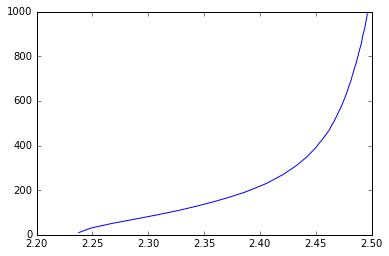

In [8]:
LLscores = []
for a in range (10, 1000, 20):
    
    model = RandomForestClassifier(n_estimators = 210 , 
                                   min_samples_split = a, 
                                   criterion = 'entropy', 
                                   n_jobs = -1)
    
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("n_estimators: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'n_estimators': range(10, 1000, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

C:  0.001 LogLoss:  2.63151964797
C:  0.051 LogLoss:  2.56022907678
C:  0.101 LogLoss:  2.55947486723
C:  0.151 LogLoss:  2.55923339199
C:  0.201 LogLoss:  2.55911633096
C:  0.251 LogLoss:  2.55904764747
C:  0.301 LogLoss:  2.55900253372
C:  0.351 LogLoss:  2.55897080178
C:  0.401 LogLoss:  2.55894728221
C:  0.451 LogLoss:  2.55892913562
C:  0.501 LogLoss:  2.55891482247
C:  0.551 LogLoss:  2.55890307189
C:  0.601 LogLoss:  2.5588933256
C:  0.651 LogLoss:  2.55888506236
C:  0.701 LogLoss:  2.55887800224
C:  0.751 LogLoss:  2.55887189067
C:  0.801 LogLoss:  2.558866546
C:  0.851 LogLoss:  2.55886181445
C:  0.901 LogLoss:  2.55885759501
C:  0.951 LogLoss:  2.55885381024
C:  1.001 LogLoss:  2.55885039626
C:  1.051 LogLoss:  2.55884729715
C:  1.101 LogLoss:  2.55884449521
C:  1.151 LogLoss:  2.55884191023
C:  1.201 LogLoss:  2.55883953678
C:  1.251 LogLoss:  2.5588373334
C:  1.301 LogLoss:  2.55883529851
C:  1.351 LogLoss:  2.55883341248
C:  1.401 LogLoss:  2.55883165117
C:  1.451 LogLoss:

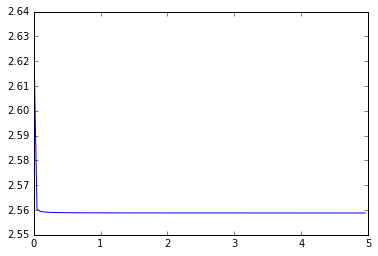

In [9]:
list= np.arange(0.001,5,0.05)
LLscores = []
for a in list:
    
    model = LogisticRegression(C=a,n_jobs=-1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("C: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'C': list, 'LogLoss': LLscores})
plt.plot(df['C'],df['LogLoss'])


# Making a prediction on the test data set

Initially we need to convert the test dataset to dummy variables similar to what we did to make “dfTrain”.


In [9]:
test=pd.read_csv('../../Dataset/test-2.csv', parse_dates = ['Dates'])
test['hour'] = test.Dates.dt.hour
test['year'] = test.Dates.dt.year

cate_variables = ['DayOfWeek','PdDistrict','hour','year']
dfTest = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(test[var_name], prefix=var_name) 
    test = test.drop([var_name], axis = 1)
    
    if dfTest.empty:
        dfTest = df
    else:
        dfTest = dfTest.join(df)
        

## BernoulliNB
<a id= 'prediction'></a>
The selected Bernoulli model that can get log_loss of 2.595 on the test data set, gets, 2.59910 which is much more accurate than the result from “cross_validation” which is around 3.37 The reason for that lays in random splitting of the test data set which changes the order of the time series and reduces the actuary of predictive modeling. So during the following Analysis I did not use any “cross_validation” or splitting.  


In [12]:
model = BernoulliNB(alpha = 170)
model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.5950533964863056

In [ ]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/Bernoullie_DS1.csv', index = True, index_label = 'Id' )

## RandomForestClassifier

The following model has a log_loss value of 2.308 on the test dataset1 with the Kaggle score of 2.83893


In [10]:
model = RandomForestClassifier(n_estimators = 600 , 
                               min_samples_split = 90, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.3081762735733782

The following model has a log_loss value of 2.308 on the test dataset1 with the Kaggle score of 2.83893

In [15]:
model = RandomForestClassifier(n_estimators = 400 , 
                               min_samples_split = 90, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.3082929891980322

In [16]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_comparison_DS1.csv', index = True, index_label = 'Id' )